In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy
from sympy.tensor.array import derive_by_array
import random

from scipy import stats
import seaborn as sns

In [50]:
# Load Dataset
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')

In [51]:
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [52]:
# Get All Columns
data.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [53]:
# Get Type of All Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [54]:
## Select only numeric features
data_num = data.select_dtypes(include= np.number)

## Save the name of numeric features into a list
columns_num = data_num.columns.to_list()

data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   New Cases                    31822 non-null  int64  
 1   New Deaths                   31822 non-null  int64  
 2   New Recovered                31822 non-null  int64  
 3   New Active Cases             31822 non-null  int64  
 4   Total Cases                  31822 non-null  int64  
 5   Total Deaths                 31822 non-null  int64  
 6   Total Recovered              31822 non-null  int64  
 7   Total Active Cases           31822 non-null  int64  
 8   City or Regency              0 non-null      float64
 9   Total Regencies              31822 non-null  int64  
 10  Total Cities                 30921 non-null  float64
 11  Total Districts              31822 non-null  int64  
 12  Total Urban Villages         30918 non-null  float64
 13  Total Rural Vill

In [55]:
for col in columns_num:
  total_missing = data[col].isnull().sum()
  if total_missing > 0:
    print(col, ' : ', total_missing)

City or Regency  :  31822
Total Cities  :  901
Total Urban Villages  :  904
Total Rural Villages  :  929
Growth Factor of New Cases  :  1939
Growth Factor of New Deaths  :  3447


Skewness value :  5.330543047780366


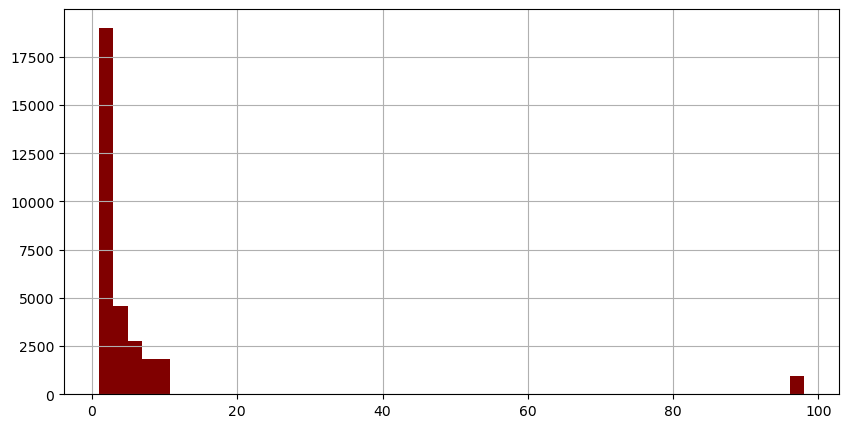

In [56]:
#Feature: Total Cities
print('Skewness value : ', data['Total Cities'].skew())
data['Total Cities'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  5.3023044702948585


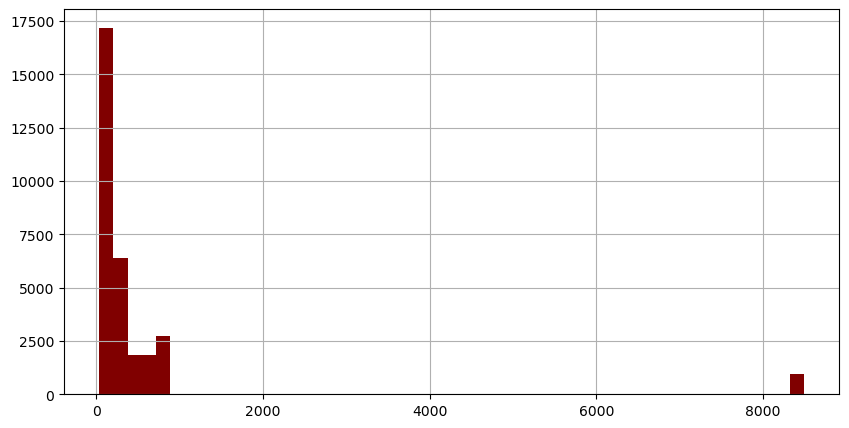

In [57]:
#Feature: Total Urban Villages
print('Skewness value : ', data['Total Urban Villages'].skew())
data['Total Urban Villages'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  5.275090820471407


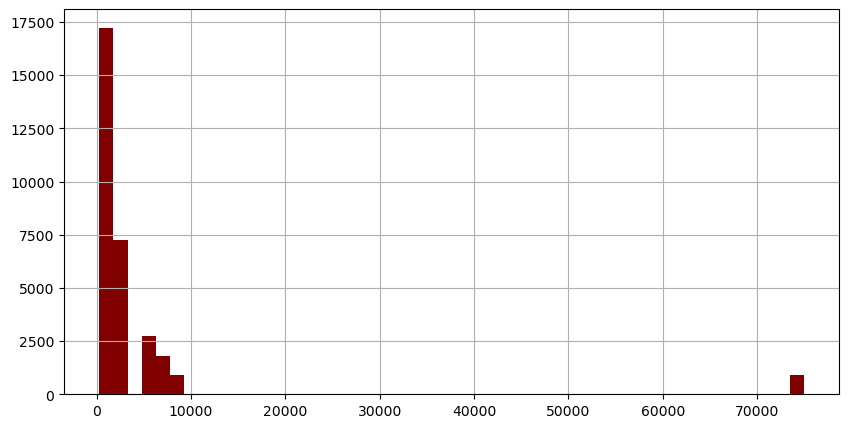

In [58]:
#Feature: Total Rural Villages
print('Skewness value : ', data['Total Rural Villages'].skew())
data['Total Rural Villages'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  23.392045876971395


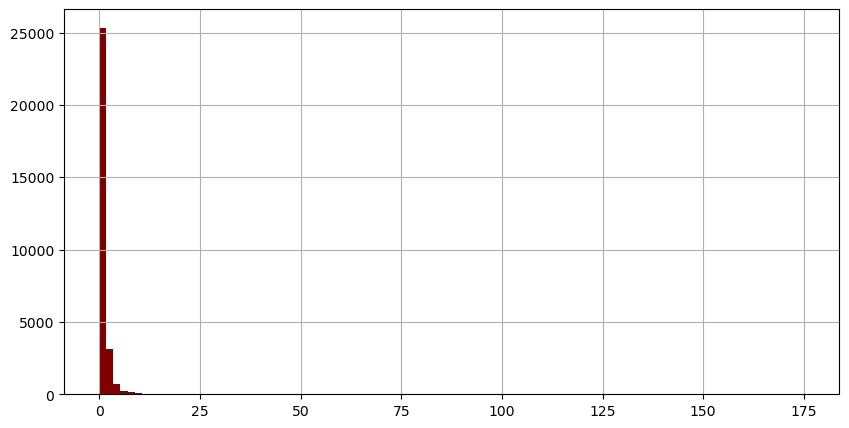

In [59]:
#Feature: Growth Factor of New Cases

print('Skewness value : ', data['Growth Factor of New Cases'].skew())
data['Growth Factor of New Cases'].hist(bins=100, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  39.289569553723936


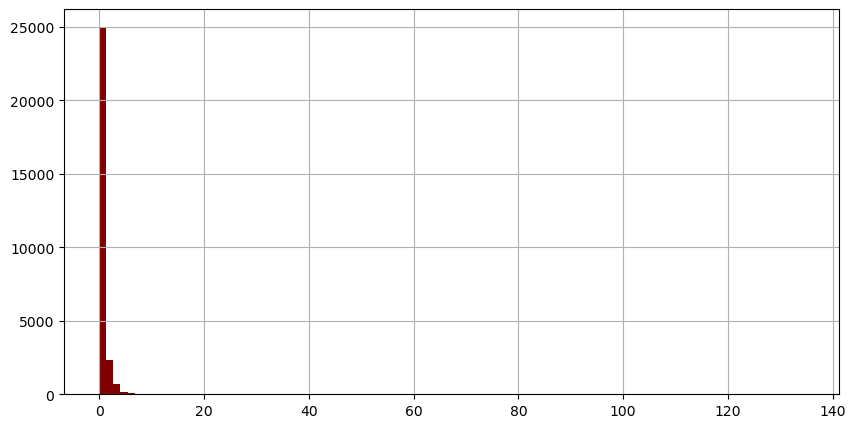

In [60]:
#Feature: Growth Factor of New Deaths

print('Skewness value : ', data['Growth Factor of New Deaths'].skew())
data['Growth Factor of New Deaths'].hist(bins=100, figsize=(10,5), color='maroon')
plt.show()

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,31822.0,4.023114e+02,2.320630e+03,0.000000,3.000000e+00,2.700000e+01,1.300000e+02,6.471800e+04
New Deaths,31822.0,9.920652e+00,6.413908e+01,0.000000,0.000000e+00,0.000000e+00,3.000000e+00,2.069000e+03
New Recovered,31822.0,3.903985e+02,2.199879e+03,0.000000,2.000000e+00,2.000000e+01,1.230000e+02,6.136100e+04
New Active Cases,31822.0,1.992238e+00,1.219513e+03,-29938.000000,-1.200000e+01,0.000000e+00,1.900000e+01,3.916500e+04
Total Cases,31822.0,1.594500e+05,6.264435e+05,1.000000,5.223250e+03,2.359650e+04,6.992775e+04,6.405044e+06
Total Deaths,31822.0,4.564753e+03,1.769373e+04,0.000000,1.280000e+02,5.655000e+02,2.189000e+03,1.578760e+05
Total Recovered,31822.0,1.492615e+05,5.958536e+05,0.000000,3.913500e+03,2.102750e+04,6.414200e+04,6.218708e+06
Total Active Cases,31822.0,5.623782e+03,2.853741e+04,-2343.000000,8.000000e+01,5.570000e+02,2.279000e+03,5.861130e+05
City or Regency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,31822.0,2.402728e+01,6.835973e+01,1.000000,7.000000e+00,1.100000e+01,1.800000e+01,4.160000e+02


In [62]:
# Handling Missing Values using Median
#Total Cities, Total Urban Villages, Total Rural Villages, Growth Factor of New Cases, Growth Factor of New Deaths
data['Total Cities'] = data['Total Cities'].fillna(data['Total Cities'].median())
data['Total Urban Villages'] = data['Total Urban Villages'].fillna(data['Total Urban Villages'].median())
data['Total Rural Villages'] = data['Total Rural Villages'].fillna(data['Total Rural Villages'].median())
data['Growth Factor of New Cases'] = data['Growth Factor of New Cases'].fillna(data['Growth Factor of New Cases'].median())
data['Growth Factor of New Deaths'] = data['Growth Factor of New Deaths'].fillna(data['Growth Factor of New Deaths'].median())
data.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,31822.0,4.023114e+02,2.320630e+03,0.000000,3.000000e+00,2.700000e+01,1.300000e+02,6.471800e+04
New Deaths,31822.0,9.920652e+00,6.413908e+01,0.000000,0.000000e+00,0.000000e+00,3.000000e+00,2.069000e+03
New Recovered,31822.0,3.903985e+02,2.199879e+03,0.000000,2.000000e+00,2.000000e+01,1.230000e+02,6.136100e+04
New Active Cases,31822.0,1.992238e+00,1.219513e+03,-29938.000000,-1.200000e+01,0.000000e+00,1.900000e+01,3.916500e+04
Total Cases,31822.0,1.594500e+05,6.264435e+05,1.000000,5.223250e+03,2.359650e+04,6.992775e+04,6.405044e+06
Total Deaths,31822.0,4.564753e+03,1.769373e+04,0.000000,1.280000e+02,5.655000e+02,2.189000e+03,1.578760e+05
Total Recovered,31822.0,1.492615e+05,5.958536e+05,0.000000,3.913500e+03,2.102750e+04,6.414200e+04,6.218708e+06
Total Active Cases,31822.0,5.623782e+03,2.853741e+04,-2343.000000,8.000000e+01,5.570000e+02,2.279000e+03,5.861130e+05
City or Regency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,31822.0,2.402728e+01,6.835973e+01,1.000000,7.000000e+00,1.100000e+01,1.800000e+01,4.160000e+02


In [63]:
# Check If Dataset Contains Missing Values

for col in columns_num:
  total_missing = data[col].isnull().sum()
  print(col, ' : ', total_missing)

print('Total Columns : ', len(columns_num))

New Cases  :  0
New Deaths  :  0
New Recovered  :  0
New Active Cases  :  0
Total Cases  :  0
Total Deaths  :  0
Total Recovered  :  0
Total Active Cases  :  0
City or Regency  :  31822
Total Regencies  :  0
Total Cities  :  0
Total Districts  :  0
Total Urban Villages  :  0
Total Rural Villages  :  0
Area (km2)  :  0
Population  :  0
Population Density  :  0
Longitude  :  0
Latitude  :  0
New Cases per Million  :  0
Total Cases per Million  :  0
New Deaths per Million  :  0
Total Deaths per Million  :  0
Total Deaths per 100rb  :  0
Growth Factor of New Cases  :  0
Growth Factor of New Deaths  :  0
Total Columns :  26


# HYPOTHESIS TESTING

In [78]:
daily_deaths = data[['Date','New Deaths']].groupby('Date').sum()
# data['date'] = data['Date'].dt.year
# print(daily_deaths)
print('Average Deaths: {} Deaths'.format(np.round(daily_deaths['New Deaths'].mean())))

Average Deaths: 339.0 Deaths


Our hypothesis on this case:

H0: μ <= 300

H1: μ > 300

In [79]:
t_stat,p_val = stats.ttest_1samp(daily_deaths['New Deaths'], 300)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.026855377958188514
t-statistics: 1.931616310150882


/Users/n1t3r41n/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


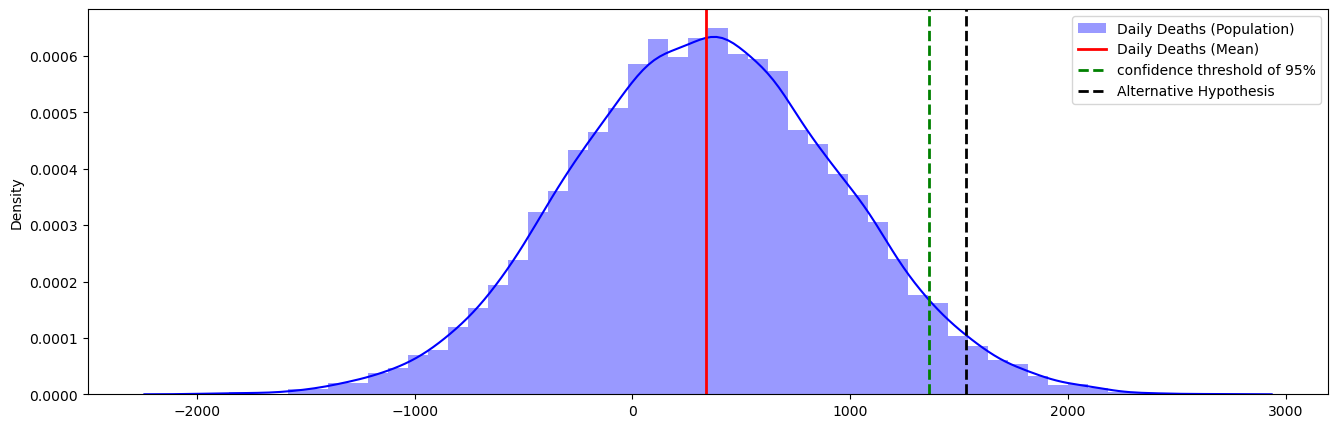

In [80]:
daily_deaths_pop = np.random.normal(daily_deaths['New Deaths'].mean(), daily_deaths['New Deaths'].std(), 10000)

ci = stats.norm.interval(0.90, daily_deaths['New Deaths'].mean(), daily_deaths['New Deaths'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_deaths_pop, label='Daily Deaths (Population)', color='blue')
plt.axvline(daily_deaths['New Deaths'].mean(), color='red', linewidth=2, label='Daily Deaths (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_deaths_pop.mean() + t_stat*daily_deaths_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Karena nilai p-value kami kurang dari 0,05, maka kami menolak hipotesis nol. Dengan kesimpulan, kematian COVID di Indonesia tahun ini meningkat dibandingkan 2 tahun yang lalu